#  Online Course Reccommondation System

#### Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [5]:
course_df = pd.read_excel(r"C:\Users\kavya\Downloads\online_course_recommendation_v2.xlsx")

In [6]:
course_df.shape


(100000, 14)

In [7]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [8]:
course_df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


###  Check missing values

In [9]:

course_df.isnull().sum()

#The dataset contains 100,000 records with no missing values. Columns include course metadata, ratings, price, user engagement, and feedback.


user_id                     0
course_id                   0
course_name                 0
instructor                  0
course_duration_hours       0
certification_offered       0
difficulty_level            0
rating                      0
enrollment_numbers          0
course_price                0
feedback_score              0
study_material_available    0
time_spent_hours            0
previous_courses_taken      0
dtype: int64

### Summary statistics

In [7]:

course_df.describe()

# The average rating is around 3.8. Prices vary widely, indicating a mix of free and premium content.


,user_id,course_id,course_duration_hours,rating,enrollment_numbers,course_price,feedback_score,time_spent_hours,previous_courses_taken
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,24935.663570,5006.863560,52.38354,3.959859,25052.822850,261.073369,0.746865,20.691054,4.992670
std,14406.960108,2882.085456,27.42347,0.729958,14388.188356,139.013758,0.143683,13.669148,2.237259
min,1.000000,1.000000,5.00000,1.000000,50.000000,20.000000,0.092000,1.000000,0.000000
25%,12487.750000,2523.000000,28.60000,3.500000,12583.750000,140.100000,0.649000,9.900000,3.000000
50%,24793.500000,5012.000000,52.40000,4.000000,25057.500000,262.310000,0.750000,19.920000,5.000000
75%,37382.250000,7502.000000,76.10000,4.500000,37522.000000,381.702500,0.851000,30.080000,6.000000
max,49999.000000,9999.000000,100.00000,5.000000,49999.000000,500.000000,1.000000,84.150000,19.000000


In [10]:
for col in ['certification_offered', 'difficulty_level', 'study_material_available']:
    print(f"\n{col}:\n", course_df[col].value_counts())



certification_offered:
 certification_offered
Yes    70059
No     29941
Name: count, dtype: int64

difficulty_level:
 difficulty_level
Beginner        49877
Intermediate    29899
Advanced        20224
Name: count, dtype: int64

study_material_available:
 study_material_available
Yes    85147
No     14853
Name: count, dtype: int64


### Visualisation

### Course difficulty level

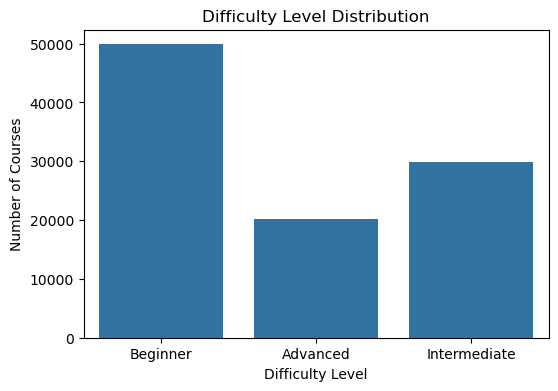

In [11]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='difficulty_level', data=course_df)
plt.title("Difficulty Level Distribution")
plt.xlabel("Difficulty Level")
plt.ylabel("Number of Courses")
plt.show()


# Most courses are beginner level, suggesting the platform is targeted toward newcomers.


### Courses with Certificartion

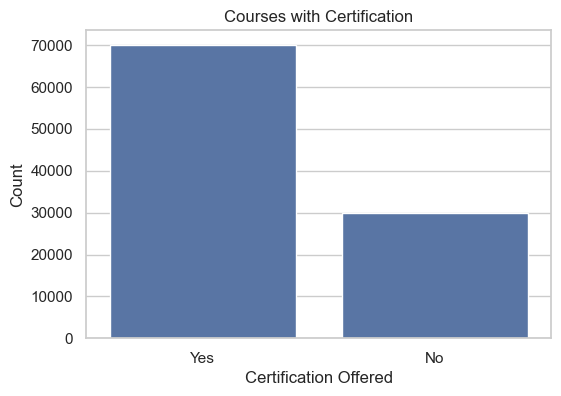

In [15]:

plt.figure(figsize=(6, 4))
sns.countplot(x='certification_offered', data=course_df)
plt.title("Courses with Certification")
plt.xlabel("Certification Offered")
plt.ylabel("Count")
plt.show()

#Around half the courses offer certification, which can be a key decision factor for learners.


### Study Material Availability

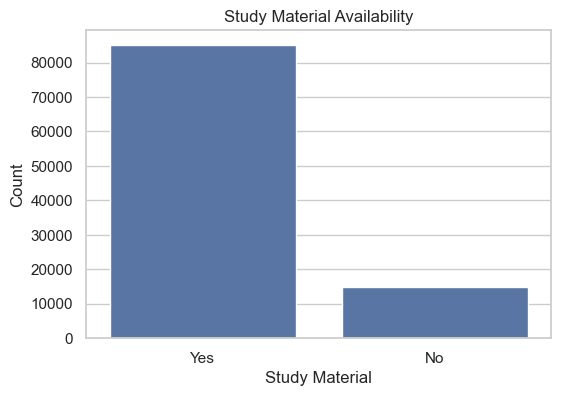

In [16]:

plt.figure(figsize=(6, 4))
sns.countplot(x='study_material_available', data=course_df)
plt.title("Study Material Availability")
plt.xlabel("Study Material")
plt.ylabel("Count")
plt.show()

#Courses with study materials are more frequent — likely improving engagement and satisfaction.


### Rating Distribution

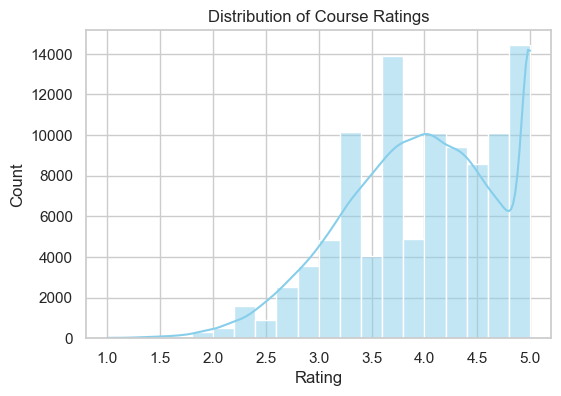

In [17]:

plt.figure(figsize=(6, 4))
sns.histplot(course_df['rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Course Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

#Ratings are "skewed towards the higher end", meaning most learners are satisfied.


### Price Distribution

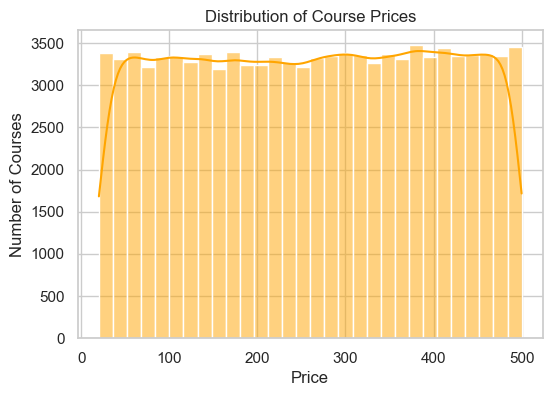

In [18]:

plt.figure(figsize=(6, 4))
sns.histplot(course_df['course_price'], bins=30, kde=True, color='orange')
plt.title("Distribution of Course Prices")
plt.xlabel("Price")
plt.ylabel("Number of Courses")
plt.show()
 #There’s a sharp peak near 0, suggesting many free courses, but a long tail for premium content.


### Correlation Heatmap


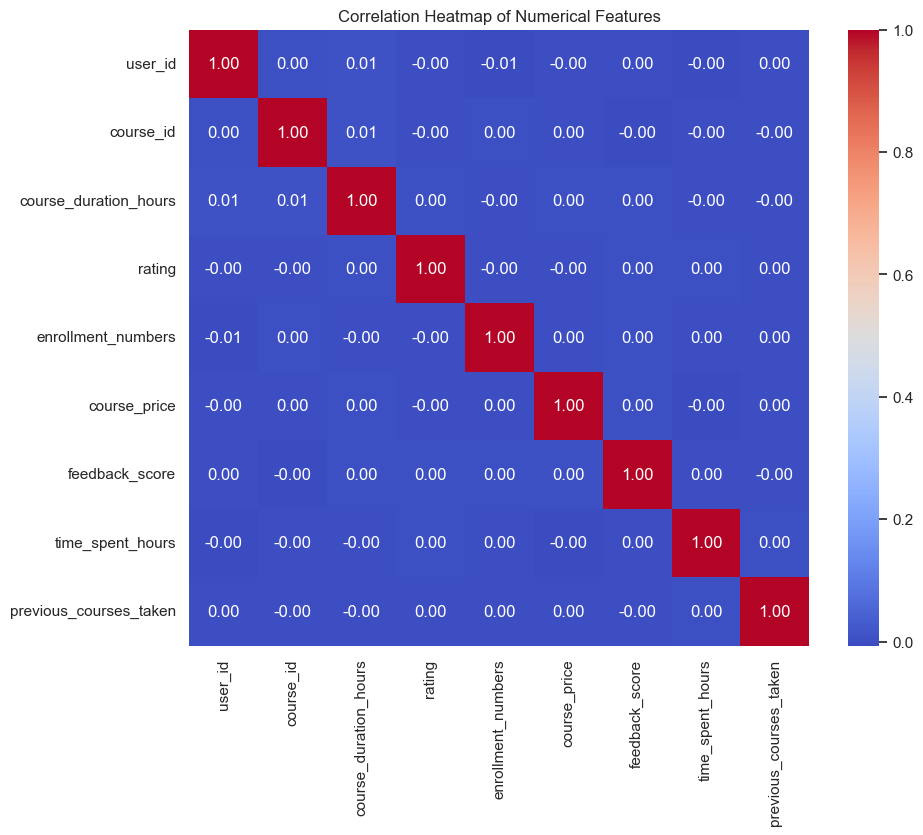

In [19]:
plt.figure(figsize=(10, 8))
corr = course_df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Moderate correlation between `rating`, `feedback_score`, and `enrollment_numbers` suggests these are quality indicators.


In [15]:
#- Most courses are beginner-friendly and rated positively.
#- Many courses are free or affordable.
#- Certification and study material availability influence ratings and enrollments.

In [34]:
print(course_df.columns)  # This will show all current column names

Index(['user_id', 'course_id', 'course_name', 'instructor',
       'course_duration_hours', 'certification_offered', 'rating',
       'enrollment_numbers', 'course_price', 'feedback_score',
       'study_material_available', 'time_spent_hours',
       'previous_courses_taken', 'difficulty_level_encoded'],
      dtype='object')
